In [1]:
import os
import glob
from collections import Counter
import matplotlib.pyplot as plt

def plot_action_distributions(dataset_path):
    """
    Generate plots for average action distribution per episode and total action distribution.
    
    Args:
        dataset_path (str): Path to the dataset directory (e.g., 'training_data/').
    """
    # Define the possible actions from the dataset description
    actions = ["Move forward", "Turn left", "Turn right"]
    
    # Initialize dictionaries and counters
    sum_proportions = {action: 0.0 for action in actions}  # Sum of proportions for averaging
    total_counts = {action: 0 for action in actions}       # Total counts across all episodes
    num_episodes = 0                                       # Number of episodes processed
    total_actions = 0                                      # Total number of actions

    # Find all episode directories
    episode_dirs = glob.glob(os.path.join(dataset_path, "*"))
    for episode_dir in episode_dirs:
        # Skip if not a directory
        if not os.path.isdir(episode_dir):
            continue
        actions_file = os.path.join(episode_dir, "actions.txt")
        # Skip if actions.txt doesn't exist
        if not os.path.exists(actions_file):
            continue
        
        # Read actions from the file
        with open(actions_file, "r") as f:
            actions_list = [line.strip() for line in f if line.strip()]
        if not actions_list:  # Skip empty files
            continue
        
        # Count actions in this episode
        n = len(actions_list)
        count = Counter(actions_list)
        
        # Update sums for average distribution and total counts
        for action in actions:
            proportion = count.get(action, 0) / n
            sum_proportions[action] += proportion
            total_counts[action] += count.get(action, 0)
        
        total_actions += n
        num_episodes += 1

    # Check if any episodes were processed
    if num_episodes == 0:
        print("No episodes found in the dataset.")
        return

    # Compute average proportions
    avg_proportions = {action: sum_proportions[action] / num_episodes for action in actions}
    # Compute total proportions
    total_proportions = {action: total_counts[action] / total_actions for action in actions}

    # Plot 1: Average Action Distribution per Episode
    plt.figure(figsize=(8, 6))
    bars = plt.bar(actions, [avg_proportions[action] for action in actions], color='skyblue')
    plt.xlabel("Actions")
    plt.ylabel("Average Proportion")
    plt.title("Average Action Distribution per Episode")
    plt.ylim(0, 1)  # Proportions are between 0 and 1
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.3f}", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    # Plot 2: Total Action Distribution across All Episodes
    plt.figure(figsize=(8, 6))
    bars = plt.bar(actions, [total_proportions[action] for action in actions], color='salmon')
    plt.xlabel("Actions")
    plt.ylabel("Proportion")
    plt.title("Total Action Distribution across All Episodes")
    plt.ylim(0, 1)  # Proportions are between 0 and 1
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.3f}", ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

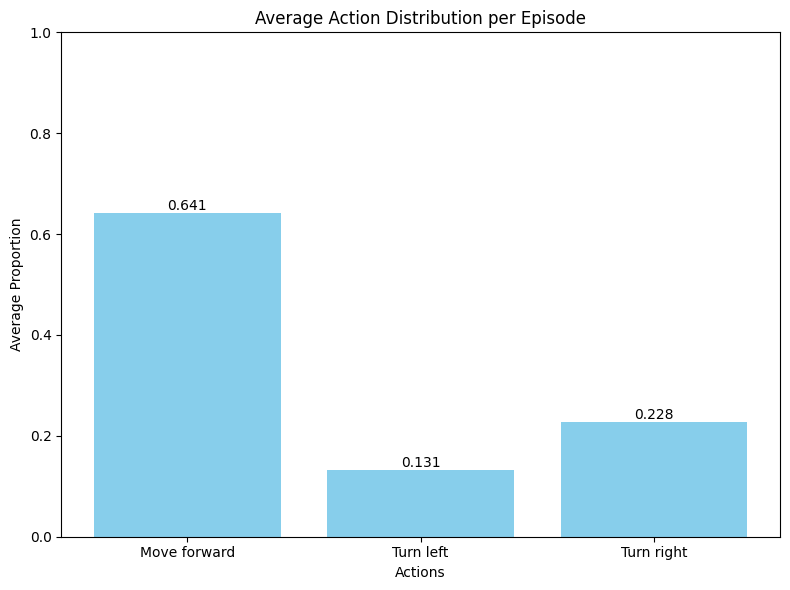

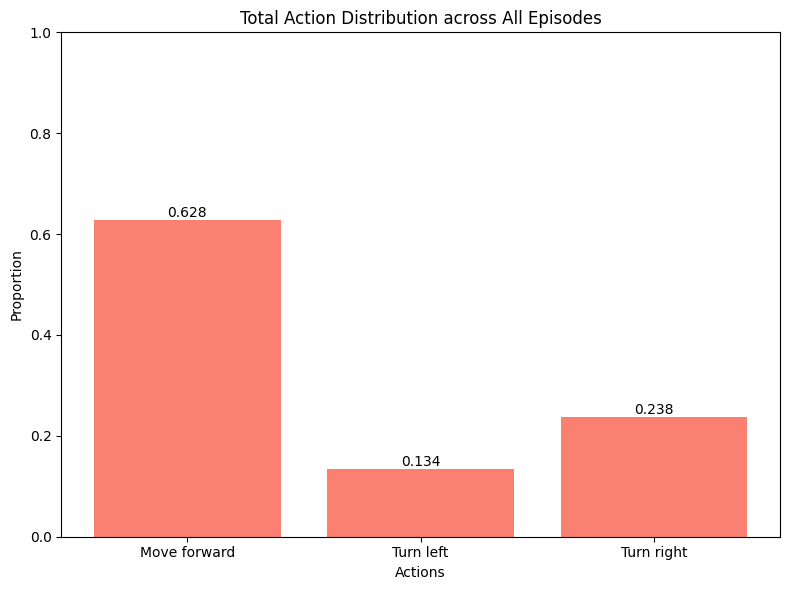

In [2]:
dataset_path = "training_data"
plot_action_distributions(dataset_path)